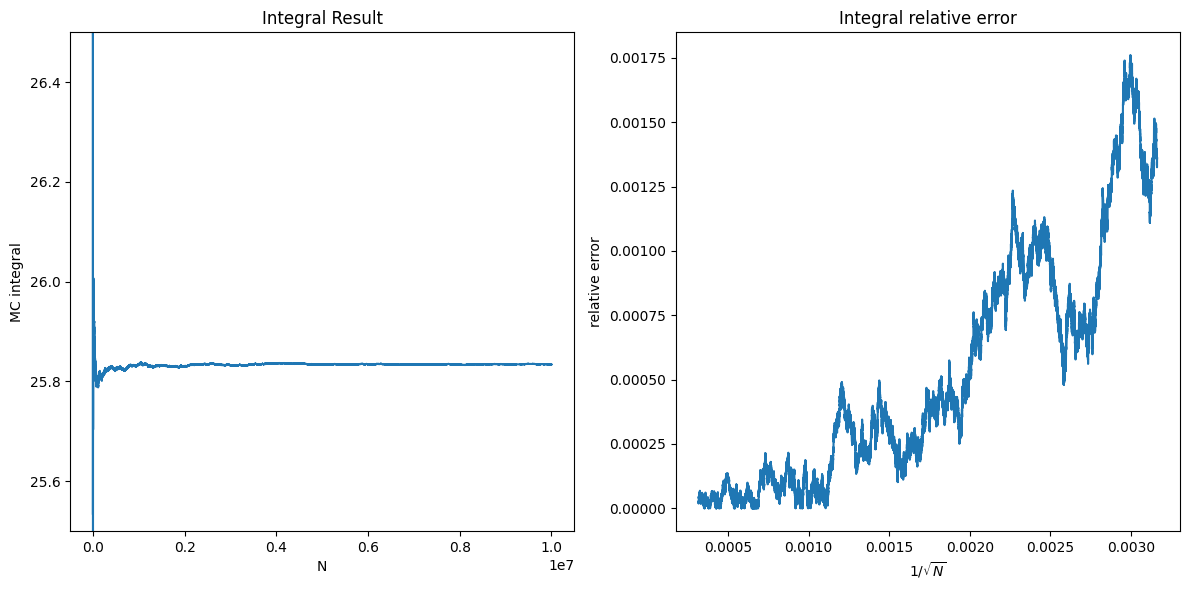

In [25]:
import numpy as np
import matplotlib.pyplot as plt


def integrand(xdata: np.ndarray) -> np.ndarray:
    """
    input:
        xdata: 10 x N array
    output:
        1 x N array
    """
    return np.sum(xdata, axis=0) ** 2


def MCIntegrate(f: callable, N: int) -> list[np.ndarray, np.ndarray]:
    """
    inputs:
        f: function to integrate -- integrand
        n: number of dimensions
        N: number of samples
    returns:

    """
    sum = f(np.random.rand(10, N))                  # 1 x N
    sum = np.cumsum(sum)                            # 1 x N
    res = sum / np.arange(1, N+1)                   # 1 x N
    relativeError = np.abs(res - 155/6) / (155/6)   # 1 x N

    return res, relativeError


N = 10000000
Nlist = np.arange(1, N+1)
res, relativeError = MCIntegrate(integrand, N)


# plot
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))

# ax1
ax1.set_title("Integral Result")
ax1.set_xlabel('N')
ax1.set_ylabel('MC integral')
ax1.set_ylim(25.5, 26.5)
ax1.plot(Nlist, res)

# ax2
ax2.set_title("Integral relative error")
ax2.set_xlabel('$1/\sqrt{N}$')
ax2.set_ylabel('relative error')
ax2.plot(1/np.sqrt(Nlist)[100000:-1], relativeError[100000:-1])

plt.tight_layout()
plt.show()
